In [44]:
import xarray as xr # reads and handles netcdf files with metadata
import numpy as np   # module for numerical computing
import pandas as pd # module for data manipulation and analysis
import geopandas as gpd
import matplotlib.pyplot as plt  #essential for plotting
import cartopy.crs as ccrs  #important for  map projections

In [45]:
path = "C:/Users/user/Downloads/Met_data/pcp_S_Korea_1970-2020_Monthly.nc"
country = "South_Korea"
data = xr.open_dataset(path)
data

<xarray.Dataset>
Dimensions:    (longitude: 14, latitude: 17, time: 612)
Coordinates:
  * longitude  (longitude) float32 126.1 126.4 126.6 126.9 ... 128.9 129.1 129.4
  * latitude   (latitude) float32 38.39 38.14 37.89 37.64 ... 34.89 34.64 34.39
  * time       (time) datetime64[ns] 1970-01-01 1970-02-01 ... 2020-12-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-15 10:14:53 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [55]:
Pr = data['tp']
Pr = Pr*1000
print(Pr.shape)

(612, 17, 14)


In [56]:
spatial_mean_pr = data.mean(dim=['latitude','longitude'])
print(spatial_mean_pr)
yearmean_pr = spatial_mean_pr.resample(time='1Y').mean()
print(yearmean_pr)
pr_clim = yearmean_pr.mean(skipna=True)
#print(f"The  annual climatological mean of the precipitation over {country} is: {pr_clim:.4f} mm/day")

<xarray.Dataset>
Dimensions:  (time: 612)
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01 1970-02-01 ... 2020-12-01
Data variables:
    tp       (time) float32 0.0005084 0.002114 0.0006005 ... 0.001458 0.0004425
<xarray.Dataset>
Dimensions:  (time: 51)
Coordinates:
  * time     (time) datetime64[ns] 1970-12-31 1971-12-31 ... 2020-12-31
Data variables:
    tp       (time) float32 0.003392 0.003373 0.004872 ... 0.003224 0.004085


In [57]:
pr_mean = Pr.mean(skipna=True,dim="time")
print(pr_mean.shape)

(17, 14)


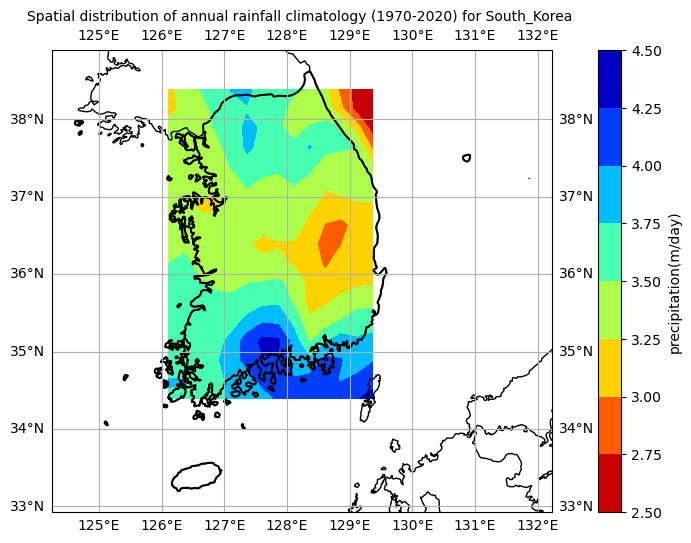

In [60]:
shapefile = gpd.read_file('C:/Users/user/Downloads/ShapeFiles/kr.shp') #set location of the shapefile from your laptop

# Choose this file from all the avialable shape files from the folder:
# Japan       -  jp.shp 
# Malaysia    -  MYS.adm0.shp
# Indonesia   -  IDN.adm0.shp
# South Korea -  kr.shp
# UAE         -  ae.shp
# Sri Lanka   -  lk.shp
# Thailand    -  thailand-provinces.shp 

#plotting the figure now
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
lon,lat = np.meshgrid(pr_mean["longitude"],pr_mean["latitude"])
plt.contourf(lon,lat,pr_mean,transform=ccrs.PlateCarree(), cmap='jet_r')
shapefile.boundary.plot(ax=ax, edgecolor='black', linewidth=1.5)
plt.title(f'Spatial distribution of annual rainfall climatology (1970-2020) for {country} ',fontsize=10)
plt.colorbar(label='precipitation(m/day)')
ax.gridlines(draw_labels=True)
plt.savefig(f'Spatial_plot.jpg',dpi=300) #save the figure

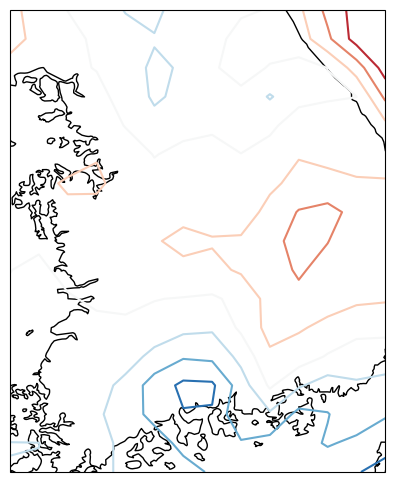

In [59]:

plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
lon,lat = np.meshgrid(Pr['longitude'],Pr['latitude'])
plt.contour(lon,lat,pr_mean,cmap='RdBu',transform=ccrs.PlateCarree())

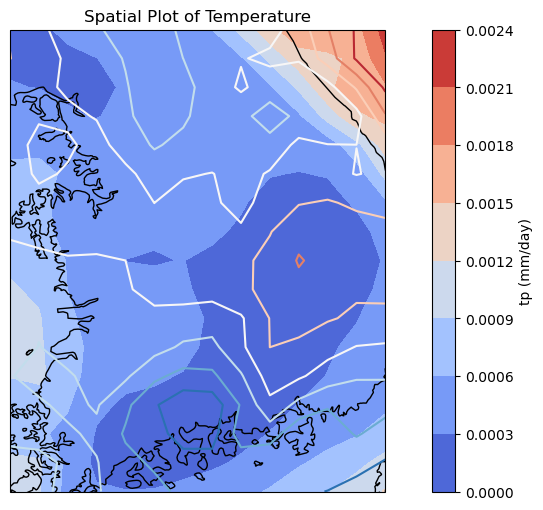

In [51]:
# Access the variables
latitude = data.variables['latitude'][:]
longitude = data.variables['longitude'][:]
tp = data.variables['tp'][0, :, :]  # Selecting the first time slice for example
# Create the plot
plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
lon,lat = np.meshgrid(Pr['longitude'],Pr['latitude'])
plt.contour(lon,lat,pr_mean,cmap='RdBu',transform=ccrs.PlateCarree())
plt.contourf(longitude, latitude, tp, cmap='coolwarm')
plt.colorbar(label='tp (mm/day)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Plot of Temperature')
plt.show()


In [61]:
Pr 

<xarray.DataArray 'tp' (time: 612, latitude: 17, longitude: 14)>
array([[[0.2650572 , 0.27491713, 0.32876992, ..., 1.6830508 ,
         1.6887393 , 2.234472  ],
        [0.27377903, 0.28098467, 0.27302092, ..., 1.4486779 ,
         1.5438683 , 2.0653288 ],
        [0.3086701 , 0.2950169 , 0.2828818 , ..., 1.449816  ,
         1.6386788 , 1.7566243 ],
        ...,
        [0.7300107 , 0.64316297, 0.5244603 , ..., 0.49639586,
         0.576037  , 0.73342305],
        [0.97613966, 0.94011146, 0.52104706, ..., 0.6841216 ,
         0.8289926 , 0.9920681 ],
        [0.9602113 , 0.9203907 , 0.49639586, ..., 0.88815486,
         1.0303715 , 1.2218896 ]],

       [[1.5586587 , 1.7175618 , 1.931456  , ..., 2.199961  ,
         1.9143894 , 1.7733108 ],
        [1.5450064 , 1.7008754 , 1.8719146 , ..., 2.402098  ,
         1.8298179 , 1.6614338 ],
        [1.6166829 , 1.6731908 , 1.8366445 , ..., 2.673257  ,
         2.0968068 , 1.5544872 ],
...
        [1.4043059 , 1.2928089 , 1.159315  , ..., 1.0770187 ,
         0.9988947 , 1.1339058 ],
        [1.2833271 , 1.1904128 , 1.0417485 , ..., 1.0045832 ,
         1.1100127 , 1.2761215 ],
        [1.0815691 , 1.0899129 , 0.9473171 , ..., 1.2450237 ,
         1.3656235 , 1.3982383 ]],

       [[0.27795136, 0.28136465, 0.28705317, ..., 0.60713476,
         0.84112865, 1.2522293 ],
        [0.3010854 , 0.30791107, 0.27681327, ..., 0.3958959 ,
         0.59120727, 1.0076165 ],
        [0.32914895, 0.33104512, 0.30032638, ..., 0.18996653,
         0.36441907, 0.56541806],
        ...,
        [1.0330267 , 0.8741226 , 0.7455591 , ..., 0.4656771 ,
         0.5354583 , 0.65264475],
        [1.2158221 , 1.0880166 , 0.80055   , ..., 0.6348202 ,
         0.79865384, 0.91280603],
        [1.3587968 , 1.1904128 , 0.9021871 , ..., 0.8817082 ,
         1.0519885 , 1.3622102 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 126.1 126.4 126.6 126.9 ... 128.9 129.1 129.4
  * latitude   (latitude) float32 38.39 38.14 37.89 37.64 ... 34.89 34.64 34.39
  * time       (time) datetime64[ns] 1970-01-01 1970-02-01 ... 2020-12-01

In [73]:
Pr_montly_clim = Pr.groupby("time.month").mean().mean(dim=["latitude","longitude"])
Pr_montly_clim

<xarray.DataArray 'tp' (month: 12)>
array([1.228718 , 1.5300702, 2.0410535, 3.1373465, 3.3506072, 5.223003 ,
       8.425924 , 7.1355543, 5.0132   , 2.0508842, 1.8187951, 1.1129112],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [75]:
print(Pr_montly_clim[5])

<xarray.DataArray 'tp' ()>
array(5.223003, dtype=float32)
Coordinates:
    month    int64 6


Text(0.5, 1.0, '51 years in South Korea Precipitation(mm/day)')

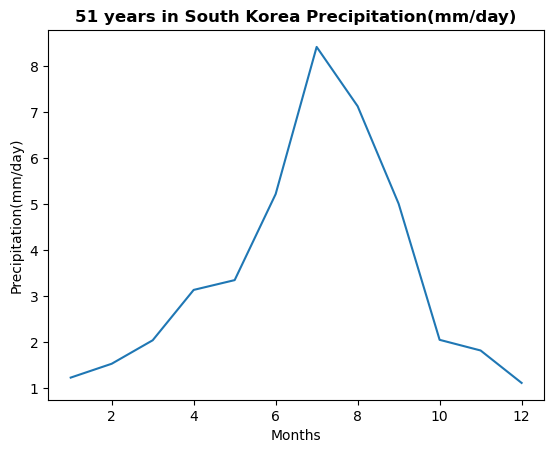

In [88]:
month = np.arange(1,13)
plt.plot(month,Pr_montly_clim)
plt.xlabel("Months")
plt.ylabel("Precipitation(mm/day)")
plt.title("51 years in South Korea Precipitation(mm/day)",weight = "bold")